In [22]:
!pip install mpl_toolkits
!conda install -y basemap

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-1.2.2              |   py37hc1111b0_0        15.2 MB  conda-forge
    conda-4.8.5                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    geos-3.8.1                 |       he1b5a44_0         1.0 MB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    proj-7.1.0                 |       h966b41f_1         2.5 MB  conda-forge
    pyproj-2.6.1.post1         |   py37hb5dadc3_1         446 KB  conda-forge
    pyshp-2.1.2                |     pyh9f0ad1d_0          35 KB  conda-forge
    -----------------------------

In [23]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [27]:
import numpy as np
from mpl_toolkits.basemap import Basemap, addcyclic

In [6]:
import pygrib
grbs = pygrib.open("dataset/gfs_4_20200921_0000_000.grb2")

In [7]:
for grb in grbs:
    print(grb)

1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009210000
2:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009210000
3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009210000
4:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009210000
5:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009210000
6:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 202009210000
7:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202009210000
8:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 202009210000
9:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 202009210000
10:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs

In [105]:
# g = grbs.select(name="V component of wind")[0]
g = grbs.select(name='Cloud mixing ratio')[0]
g

1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009210000

In [106]:
lats, lons = g.latlons()
lats, lons

(array([[ 90. ,  90. ,  90. , ...,  90. ,  90. ,  90. ],
        [ 89.5,  89.5,  89.5, ...,  89.5,  89.5,  89.5],
        [ 89. ,  89. ,  89. , ...,  89. ,  89. ,  89. ],
        ...,
        [-89. , -89. , -89. , ..., -89. , -89. , -89. ],
        [-89.5, -89.5, -89.5, ..., -89.5, -89.5, -89.5],
        [-90. , -90. , -90. , ..., -90. , -90. , -90. ]]),
 array([[  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5],
        [  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5],
        [  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5],
        ...,
        [  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5],
        [  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5],
        [  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5]]))

In [107]:
g.keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatest',
 'grib2divider',
 'is_efas',
 'angularPrecision',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'section3Length',
 'numberOfSection',
 'sourceOfGridDefinition',
 'numberOfDataPoints',
 'numberOfOctectsForNumberOfPoints',
 'interpretatio

In [124]:
grb = grbs.select(name="V component of wind")
length = len(grb)

In [114]:
# levelを書き出してみる
levels = np.array([g['level'] for g in grb])
levels

array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  925,  950,  975,
       1000])

In [125]:
# argsortする
np.argsort(levels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [115]:
# 並べ変える
argsort = np.argsort(levels)
indexes = argsort[::-1]
indexes

array([22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1,  0])

In [116]:
levels

array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  925,  950,  975,
       1000])

In [117]:
grb[0].values.shape, grb[1].values.shape, 

((361, 720), (361, 720))

In [118]:
x = grb[0].values.shape[0]
y = grb[1].values.shape[1]

In [119]:
# cube状の箱を作る
cube = np.zeros([len(grb), x, y])
cube.shape

(23, 361, 720)

In [120]:
for i in range(len(grb)):
    cube[i,:,:] = grb[indexes[i]].values
cube_dict = {
    'data': cube,
    'units': grb[0]['units'],
    'levels': levels[indexes]
}    

In [121]:
cube_dict

{'data': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0

In [122]:
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


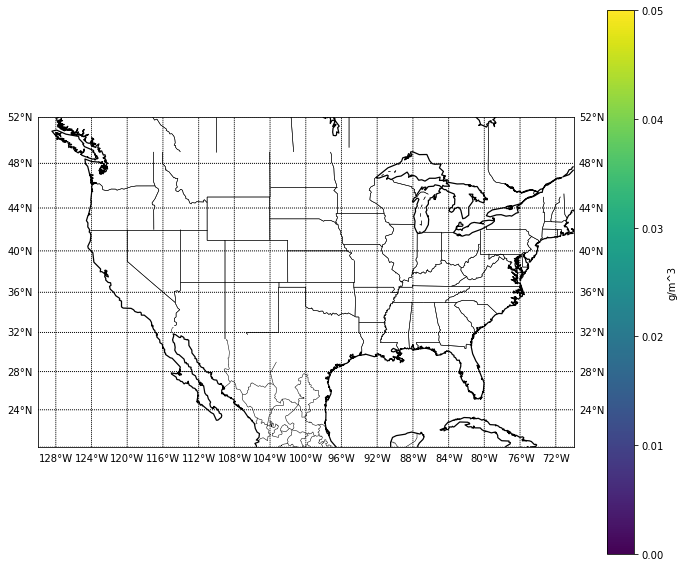

In [123]:
import matplotlib.pyplot as plt
from matplotlib import colors
# rcParams['pcolor.shading'] = 'auto'
fig = plt.figure(figsize=[12, 10])
m = Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-70, urcrnrlat=52, projection='mill', area_thresh=10000, resolution='l')
x, y = m(lons, lats)

my_mesh = m.pcolormesh(x, y, cube_dict['data'][10]*1000.0, vmax = .05)
my_cast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates()

my_p = m.drawparallels(np.arange(20, 80, 4),labels=[1,1,0,0])
my_m = m.drawmeridians(np.arange(-140,-60,4),labels=[0,0,0,1])
plt.colorbar(label='g/m^3')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  import sys


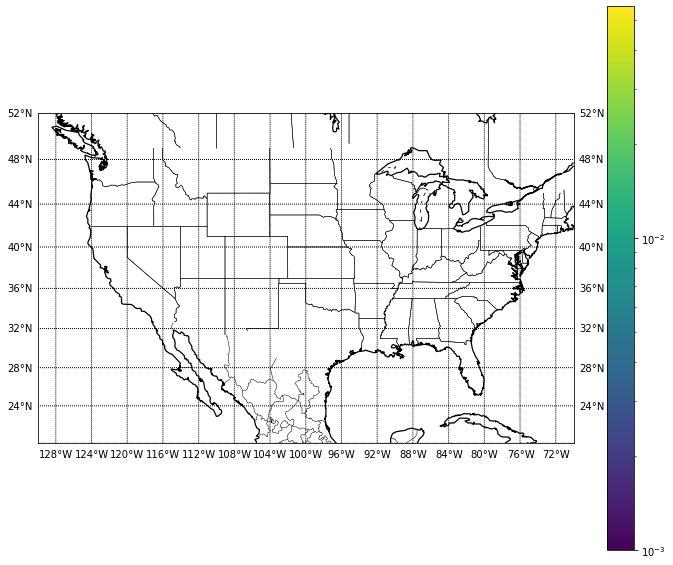

In [102]:
f = plt.figure(figsize=[12,10])
m = Basemap(llcrnrlon = -130,llcrnrlat = 20, urcrnrlon = -70,
           urcrnrlat = 52 , projection = 'mill', area_thresh =10000 ,
           resolution='l')
x, y = m(lons, lats)

my_mesh = m.pcolormesh(x, y, cube_dict['data'][0], vmax =  1e-3, norm=colors.LogNorm())
my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates()
my_p = m.drawparallels(np.arange(20,80,4),labels=[1,1,0,0])
my_m = m.drawmeridians(np.arange(-140,-60,4),labels=[0,0,0,1])
plt.colorbar()

In [100]:
cube_dict.keys()

dict_keys(['data', 'units', 'levels'])

In [112]:
cube_dict['data'].shape

(47, 361, 720)

In [104]:
cube_dict['data']

array([[[ 9.35537720e+00,  9.35537720e+00,  9.35537720e+00, ...,
          9.35537720e+00,  9.35537720e+00,  9.35537720e+00],
        [ 9.96920997e+36,  9.96920997e+36,  9.96920997e+36, ...,
          9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
        [ 9.96920997e+36,  9.96920997e+36,  9.96920997e+36, ...,
          9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
        ...,
        [-3.84462285e+00, -3.94462276e+00, -4.04462290e+00, ...,
         -3.44462276e+00, -3.54462290e+00, -3.64462280e+00],
        [-3.04462290e+00, -3.04462290e+00, -3.14462280e+00, ...,
         -2.84462285e+00, -2.94462276e+00, -2.94462276e+00],
        [-3.14462280e+00, -3.14462280e+00, -3.24462295e+00, ...,
         -3.14462280e+00, -3.14462280e+00, -3.14462280e+00]],

       [[ 1.27051516e+01,  1.27151508e+01,  1.27251511e+01, ...,
          1.26751509e+01,  1.26851511e+01,  1.26951513e+01],
        [ 1.24951515e+01,  1.25251513e+01,  1.25451508e+01, ...,
          1.24051514e+01,  1.24351511e